In [543]:
# In this notebook, I will want to check the amount of time spent in the execution of each cell, so I need to install an additional package
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.05 s (started: 2021-04-20 00:25:40 +00:00)


In [544]:
import time
start = time.time() #start time noted

time: 2.63 ms (started: 2021-04-20 00:25:43 +00:00)


In [545]:
from google.colab import drive, files 
drive.mount('/content/drive/', force_remount=True)  #mounting drive

Mounted at /content/drive/
time: 1.07 s (started: 2021-04-20 00:25:43 +00:00)


### Install required packages

In [546]:
#import pandas and numpy for operations
import pandas as pd  #dataframes
import numpy as np #arrays 

time: 1.96 ms (started: 2021-04-20 00:25:44 +00:00)


In [547]:
#import packages to calculate location distances 
from sklearn.metrics.pairwise import manhattan_distances #manhattan distances
from math import radians

time: 1.91 ms (started: 2021-04-20 00:25:44 +00:00)


In [548]:
#import packages to plot maps and plots
import matplotlib.pyplot as plt
import seaborn as sns
#plotly packages
import plotly.express as px 
import plotly.graph_objects as go
import networkx as nx 
from pylab import * 

time: 10.3 ms (started: 2021-04-20 00:25:44 +00:00)


###Data wrangling

In [549]:
#Reading data for Town Centroids
# https://drive.google.com/file/d/1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6/view?usp=sharing
!gdown --id 1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6
data = pd.read_excel('/content/drive/Shareddrives/Business Decision Modeling/Project 3/Group 3 Data.xlsx')

Downloading...
From: https://drive.google.com/uc?id=1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6
To: /content/townCents.csv
100% 20.1k/20.1k [00:00<00:00, 38.0MB/s]
time: 962 ms (started: 2021-04-20 00:25:44 +00:00)


In [550]:
data.head()

,Store Number,Address,City,Lat,Lon
0,Connecticut State Capitol,"210 Capitol Ave Hartford, CT 06106",Hartford,41.764290,-72.682499
1,556,"1657 Route 12 Gales Ferry, CT 06335",Gales Ferry,41.427845,-72.082832
2,2056,"25 Broadway, Corner Of East Main Mystic, CT 06355",Mystic,41.352719,-71.963196
3,124,"98 Bridge St. Naugatuck, CT 06770",Naugatuck,41.501944,-73.053007
4,2220,"3514 Main St. Coventry, CT 06238",Coventry,41.798062,-72.368803


time: 21.3 ms (started: 2021-04-20 00:25:45 +00:00)


In [551]:
# X-longitude,Y-latitude 
geogTable = data[['Lat', 'Lon']]

#check location data
data

,Store Number,Address,City,Lat,Lon
0,Connecticut State Capitol,"210 Capitol Ave Hartford, CT 06106",Hartford,41.764290,-72.682499
1,556,"1657 Route 12 Gales Ferry, CT 06335",Gales Ferry,41.427845,-72.082832
2,2056,"25 Broadway, Corner Of East Main Mystic, CT 06355",Mystic,41.352719,-71.963196
3,124,"98 Bridge St. Naugatuck, CT 06770",Naugatuck,41.501944,-73.053007
4,2220,"3514 Main St. Coventry, CT 06238",Coventry,41.798062,-72.368803
5,1968,"369 Main Street East Haven, CT 06512",East Haven,41.280455,-72.875420
6,857,"660 Foxon Rd. East Haven, CT 06513",East Haven,41.321652,-72.851992
7,1151,"464 Reidville Drive Waterbury, CT 06705",Waterbury,41.539105,-72.997707
8,17238,"300 Chase Ave Waterbury, CT 06704",Waterbury,41.583317,-73.033702
9,1960,"1279 West Main Street, Robinwood Shopping Plaz...",Waterbury,41.551629,-73.063912


time: 42.8 ms (started: 2021-04-20 00:25:45 +00:00)


In [552]:
data['City'].unique() # all counties available

array(['Hartford', 'Gales Ferry', 'Mystic ', 'Naugatuck ', 'Coventry',
       'East Haven', 'Waterbury', 'Branford', 'Burlington', 'Cromwell',
       'Granby', 'Plainfield', 'Enfield', 'New Haven', 'Suffield',
       'Bethel ', 'Norwalk', 'Old Saybrook ', 'New Britain', 'Orange',
       'Shelton'], dtype=object)

time: 6.63 ms (started: 2021-04-20 00:25:45 +00:00)


In [553]:
#Simplify to only 23 towns...
# df=data[data['COUNTY']=='Fairfield'] # get all the 23 towns in Fairfield County 
df = data
df.shape #check shape to verify df

(37, 5)

time: 8.72 ms (started: 2021-04-20 00:25:45 +00:00)


In [554]:
df.reset_index(inplace=True) #reset index

time: 2.71 ms (started: 2021-04-20 00:25:45 +00:00)


In [555]:
#plotting the towns on an interactive map
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon", color="City",zoom=8.25) #easy format to draw maps on plotly
fig.update_layout(mapbox_style="carto-darkmatter",title="City Map")
config = dict({'scrollZoom': False}) #stopped zoom config for standard view capture
fig.show(config=config)

time: 492 ms (started: 2021-04-20 00:25:45 +00:00)


In [556]:
# X-longitude,Y-latitude 
geogTable = df[['City','Lat', 'Lon']] 
geogTable #verify geogTable

,City,Lat,Lon
0,Hartford,41.764290,-72.682499
1,Gales Ferry,41.427845,-72.082832
2,Mystic,41.352719,-71.963196
3,Naugatuck,41.501944,-73.053007
4,Coventry,41.798062,-72.368803
5,East Haven,41.280455,-72.875420
6,East Haven,41.321652,-72.851992
7,Waterbury,41.539105,-72.997707
8,Waterbury,41.583317,-73.033702
9,Waterbury,41.551629,-73.063912


time: 44.4 ms (started: 2021-04-20 00:25:46 +00:00)


In [557]:
#Make a back-up of the original XY data...
geogTable_orig = geogTable

time: 914 µs (started: 2021-04-20 00:25:46 +00:00)


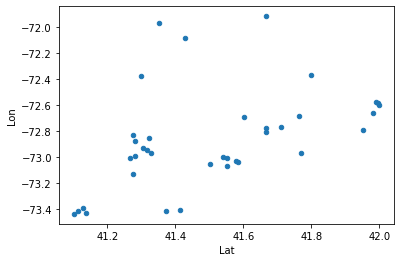

time: 217 ms (started: 2021-04-20 00:25:46 +00:00)


In [558]:
#2D map of the cities...
geogTable.plot.scatter(x='Lat', y='Lon') #x=long,Y=lat here
plt.show()

## **USING OR TOOLS:**

##### Install OR TOOLS package

In [559]:
!pip install ortools

time: 3.05 s (started: 2021-04-20 00:25:46 +00:00)


In [560]:
from sklearn.metrics.pairwise import manhattan_distances
# got the same result!
# you can just call this df and reference it below for data
geogDist1=np.round(manhattan_distances(geogTable[['Lat', 'Lon']])* 6371000/1000)  # multiply by Earth radius to get kilometers
#we rounded the value to compare the resullt with other solvers

time: 4.22 ms (started: 2021-04-20 00:25:49 +00:00)


####Import Google OR tools solver packages

In [561]:
# [START import]

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# [END import]

time: 2.39 ms (started: 2021-04-20 00:25:49 +00:00)


#### Create Distance matrix 

In [562]:
# [START data_model]

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = geogDist1 #cost matrix
    data['num_vehicles'] = 1 #one vehicle
    data['depot'] = 0 #no depot
    return data

# [END data_model]

time: 5.67 ms (started: 2021-04-20 00:25:49 +00:00)


### Solution print function

In [589]:
# [START solution_printer]

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} km'.format(solution.ObjectiveValue())) #printing objective function
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    tsp=[] #solution matrix
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        tsp.append(manager.IndexToNode(index)) #adding solution
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}km\n'.format(route_distance)
    return tsp

# [END solution_printer]

time: 18.8 ms (started: 2021-04-20 00:28:49 +00:00)


### Create a model

In [590]:
# Instantiate the data problem.
# [START data]

data = create_data_model() # create model

# [END data]

time: 2.18 ms (started: 2021-04-20 00:28:50 +00:00)


In [591]:
# Create the routing index manager.
# [START index_manager]

manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])

# [END index_manager]

# Create Routing Model.
# [START routing_model]

routing = pywrapcp.RoutingModel(manager)

# [END routing_model]

time: 10.6 ms (started: 2021-04-20 00:28:50 +00:00)


####Link nodes with distance and a callback

In [592]:
# [START transit_callback]

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix Node Index.
    from_node = manager.IndexToNode(from_index) #link nodes with distance
    to_node = manager.IndexToNode(to_index)     #new distance matrix that OR tools understand
    return data['distance_matrix'][from_node][to_node]

#set a callback to the distance or cost function
transit_callback_index = routing.RegisterTransitCallback(distance_callback) 
# [END transit_callback]

time: 8.71 ms (started: 2021-04-20 00:28:50 +00:00)


#### Define cost of each arc.

In [593]:
# Define cost of each arc.
# [START arc_cost]

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index) #use that callback to configure the objective heuristic(cost)

# [END arc_cost]

time: 2.68 ms (started: 2021-04-20 00:28:50 +00:00)


#### Scenario 1: Automatic (just accept all defaults)


In [594]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters() #setting default parameters for TSP

time: 1.87 ms (started: 2021-04-20 00:28:50 +00:00)


###### Solve the problem.

In [595]:
# [START solve]

# Solve the problem.
solution1 = routing.SolveWithParameters(search_parameters) #solve with those parameters

# [END solve]


time: 63.7 ms (started: 2021-04-20 00:28:50 +00:00)


###### Print solution 

In [596]:
# [START print_solution]

#use the print function generated before to print the solution & add to tsp array
if solution1:
    tsp=print_solution(manager, routing, solution1) 

# [END print_solution]

Objective: 40524 km
Route for vehicle 0:
 0 -> 31 -> 32 -> 33 -> 11 -> 8 -> 9 -> 3 -> 25 -> 24 -> 29 -> 28 -> 26 -> 27 -> 36 -> 35 -> 34 -> 5 -> 12 -> 6 -> 20 -> 21 -> 22 -> 7 -> 10 -> 13 -> 15 -> 23 -> 19 -> 18 -> 17 -> 4 -> 16 -> 2 -> 1 -> 30 -> 14 -> 0

time: 3.62 ms (started: 2021-04-20 00:28:50 +00:00)


In [597]:
tsp=np.array(tsp) 
tsp #solution array

array([ 0, 31, 32, 33, 11,  8,  9,  3, 25, 24, 29, 28, 26, 27, 36, 35, 34,
        5, 12,  6, 20, 21, 22,  7, 10, 13, 15, 23, 19, 18, 17,  4, 16,  2,
        1, 30, 14])

time: 5.35 ms (started: 2021-04-20 00:28:50 +00:00)


In [598]:
# now reindex the original data
geogTable_orig1 = geogTable_orig.reindex(tsp)
geogTable_orig1 = geogTable_orig1.append(geogTable_orig1.iloc[0,:])
geogTable_orig1

,City,Lat,Lon
0,Hartford,41.764290,-72.682499
31,New Britain,41.711125,-72.762979
32,New Britain,41.666665,-72.776664
33,New Britain,41.667414,-72.805806
11,Waterbury,41.578216,-73.027191
8,Waterbury,41.583317,-73.033702
9,Waterbury,41.551629,-73.063912
3,Naugatuck,41.501944,-73.053007
25,Bethel,41.414648,-73.401998
24,Bethel,41.373567,-73.414798


time: 32.3 ms (started: 2021-04-20 00:28:50 +00:00)


###### Visualize the solution

In [599]:
mean(geogTable_orig1['Lat']) #for center of Map-mean latitude

41.51695019943607

time: 7 ms (started: 2021-04-20 00:28:50 +00:00)


In [600]:
mean(geogTable_orig1['Lon']) #for center of Map-mean longitude

-72.8534565486349

time: 7.52 ms (started: 2021-04-20 00:28:50 +00:00)


In [601]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig1['Lon'],
    lat = geogTable_orig1['Lat'],
    name="Main Route",
    hovertext=geogTable_orig1['City'],
    marker = {'size': 10}))

for i in range(len(geogTable_orig1)):
  fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lat = [geogTable_orig1.iloc[i,1],geogTable_orig1.iloc[i-1,1]],
    lon = [geogTable_orig1.iloc[i,2],geogTable_orig1.iloc[i-1,2]],
    name="Route"+str(i),
    text=[geogTable_orig1.iloc[i,0]+'-'+str(i),geogTable_orig1.iloc[i-1,0]+'-'+str(i-1)],
    textposition='top center',
    marker = {'size': 10}))
  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.50435,mapbox_center_lon = -72.8587,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 762 ms (started: 2021-04-20 00:28:50 +00:00)


In [602]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig1['Lon'], #longitude
    lat = geogTable_orig1['Lat'], #latitude
    name="Traveling Salesman", 
    hovertext=geogTable_orig1['City'], #town name
    marker = {'size': 10}),
    layout=go.Layout(
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
        frames=[go.Frame(
        data=[go.Scattermapbox(
            lat=[geogTable_orig1.iloc[k,1]],
            lon=[geogTable_orig1.iloc[k,2]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(len(geogTable_orig2))]
)
fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig1['Lon'], #longitude
    lat = geogTable_orig1['Lat'], #latitude
    name="Main Route", 
    hovertext=geogTable_orig1['City'], #town name
    marker=dict(color="blue", size=5)))

  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8,  mapbox_center_lat = 41.50435,mapbox_center_lon = -72.8587,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 2.86 s (started: 2021-04-20 00:28:51 +00:00)


#### Scenario 2: Try a different first solution strategy


In [603]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters() #setting default parameters for TSP   #more options in VRP 
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.CHRISTOFIDES) # set it to PATH_CHEAPEST_ARC mode for strategy 

time: 3.21 ms (started: 2021-04-20 00:28:54 +00:00)


###### Solve the problem.

In [604]:
# [START solve]

# Solve the problem.
solution2 = routing.SolveWithParameters(search_parameters) #solve with those parameters

# [END solve]

time: 65.6 ms (started: 2021-04-20 00:28:54 +00:00)


###### Print solution.

In [605]:
# [START print_solution]

#use the print function generated before to print the solution & add to tsp array
if solution2:
    tsp=print_solution(manager, routing, solution2) 

# [END print_solution]

Objective: 40524 km
Route for vehicle 0:
 0 -> 31 -> 32 -> 33 -> 10 -> 7 -> 22 -> 21 -> 20 -> 6 -> 12 -> 5 -> 34 -> 35 -> 36 -> 27 -> 26 -> 28 -> 29 -> 24 -> 25 -> 3 -> 9 -> 8 -> 11 -> 13 -> 15 -> 23 -> 19 -> 18 -> 17 -> 4 -> 16 -> 2 -> 1 -> 30 -> 14 -> 0

time: 5.5 ms (started: 2021-04-20 00:28:54 +00:00)


In [606]:
tsp=np.array(tsp) 
tsp #solution array

array([ 0, 31, 32, 33, 10,  7, 22, 21, 20,  6, 12,  5, 34, 35, 36, 27, 26,
       28, 29, 24, 25,  3,  9,  8, 11, 13, 15, 23, 19, 18, 17,  4, 16,  2,
        1, 30, 14])

time: 9.38 ms (started: 2021-04-20 00:28:54 +00:00)


In [607]:
# now reindex the original data
geogTable_orig2 = geogTable_orig.reindex(tsp)
geogTable_orig2 = geogTable_orig2.append(geogTable_orig2.iloc[0,:])
geogTable_orig2

,City,Lat,Lon
0,Hartford,41.764290,-72.682499
31,New Britain,41.711125,-72.762979
32,New Britain,41.666665,-72.776664
33,New Britain,41.667414,-72.805806
10,Waterbury,41.552161,-73.000983
7,Waterbury,41.539105,-72.997707
22,New Haven,41.329171,-72.968372
21,New Haven,41.316277,-72.939591
20,New Haven,41.306312,-72.925229
6,East Haven,41.321652,-72.851992


time: 36.8 ms (started: 2021-04-20 00:28:54 +00:00)


###### Visualize the solution

In [608]:
mean(geogTable_orig2['Lat']) #for center of Map-mean latitude

41.516950199436074

time: 7 ms (started: 2021-04-20 00:28:54 +00:00)


In [609]:
mean(geogTable_orig2['Lon']) #for center of Map-mean longitude

-72.85345654863488

time: 7.41 ms (started: 2021-04-20 00:28:54 +00:00)


In [610]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['Lon'],
    lat = geogTable_orig2['Lat'],
    name="Main Route",
    hovertext=geogTable_orig2['City'],
    marker = {'size': 10}))

for i in range(len(geogTable_orig2)):
  fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lat = [geogTable_orig2.iloc[i,1],geogTable_orig2.iloc[i-1,1]],
    lon = [geogTable_orig2.iloc[i,2],geogTable_orig2.iloc[i-1,2]],
    name="Route"+str(i),
    text=[geogTable_orig2.iloc[i,0]+'-'+str(i),geogTable_orig2.iloc[i-1,0]+'-'+str(i-1)],
    textposition='top center',
    marker = {'size': 10}))
  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.15, mapbox_center_lat = 41.50435,mapbox_center_lon = -72.8587,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 724 ms (started: 2021-04-20 00:28:54 +00:00)


In [611]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['Lon'], #longitude
    lat = geogTable_orig2['Lat'], #latitude
    name="Traveling Salesman", 
    hovertext=geogTable_orig2['City'], #town name
    marker = {'size': 10}),
    layout=go.Layout(
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
        frames=[go.Frame(
        data=[go.Scattermapbox(
            lat=[geogTable_orig2.iloc[k,1]],
            lon=[geogTable_orig2.iloc[k,2]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(len(geogTable_orig2))]
)
fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['Lon'], #longitude
    lat = geogTable_orig2['Lat'], #latitude
    name="Main Route", 
    hovertext=geogTable_orig2['City'], #town name
    marker=dict(color="blue", size=5)))

  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8,  mapbox_center_lat = 41.50435,mapbox_center_lon = -72.8587,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 2.93 s (started: 2021-04-20 00:28:55 +00:00)


#### Scenario 3: Try a different local search option

In [612]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.SIMULATED_ANNEALING)

time: 2.32 ms (started: 2021-04-20 00:28:58 +00:00)


###### Solve the problem.

In [613]:
# [START solve]

# Solve the problem.
solution3 = routing.SolveWithParameters(search_parameters) #solve with those parameters

# [END solve]


time: 68.1 ms (started: 2021-04-20 00:28:58 +00:00)


###### Print solution 

In [614]:
# [START print_solution]

#use the print function generated before to print the solution & add to tsp array
if solution3:
    tsp=print_solution(manager, routing, solution3) 

# [END print_solution]

Objective: 40524 km
Route for vehicle 0:
 0 -> 31 -> 32 -> 33 -> 11 -> 8 -> 9 -> 3 -> 25 -> 24 -> 29 -> 28 -> 26 -> 27 -> 36 -> 35 -> 34 -> 5 -> 12 -> 6 -> 20 -> 21 -> 22 -> 7 -> 10 -> 13 -> 15 -> 23 -> 19 -> 18 -> 17 -> 4 -> 16 -> 2 -> 1 -> 30 -> 14 -> 0

time: 4.79 ms (started: 2021-04-20 00:28:58 +00:00)


In [615]:
tsp=np.array(tsp) 
tsp #solution array

array([ 0, 31, 32, 33, 11,  8,  9,  3, 25, 24, 29, 28, 26, 27, 36, 35, 34,
        5, 12,  6, 20, 21, 22,  7, 10, 13, 15, 23, 19, 18, 17,  4, 16,  2,
        1, 30, 14])

time: 5.73 ms (started: 2021-04-20 00:28:58 +00:00)


In [616]:
# now reindex the original data
geogTable_orig3 = geogTable_orig.reindex(tsp)
geogTable_orig3 = geogTable_orig3.append(geogTable_orig3.iloc[0,:])
geogTable_orig3

,City,Lat,Lon
0,Hartford,41.764290,-72.682499
31,New Britain,41.711125,-72.762979
32,New Britain,41.666665,-72.776664
33,New Britain,41.667414,-72.805806
11,Waterbury,41.578216,-73.027191
8,Waterbury,41.583317,-73.033702
9,Waterbury,41.551629,-73.063912
3,Naugatuck,41.501944,-73.053007
25,Bethel,41.414648,-73.401998
24,Bethel,41.373567,-73.414798


time: 35.8 ms (started: 2021-04-20 00:28:58 +00:00)


###### Visualize the solution

In [617]:
mean(geogTable_orig3['Lat']) #for center of Map-mean latitude

41.51695019943607

time: 8.19 ms (started: 2021-04-20 00:28:58 +00:00)


In [618]:
mean(geogTable_orig3['Lon']) #for center of Map-mean longitude

-72.8534565486349

time: 7 ms (started: 2021-04-20 00:28:58 +00:00)


In [619]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig3['Lon'],
    lat = geogTable_orig3['Lat'],
    name="Main Route",
    hovertext=geogTable_orig3['City'],
    marker = {'size': 10}))

for i in range(len(geogTable_orig3)):
  fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lat = [geogTable_orig3.iloc[i,1],geogTable_orig3.iloc[i-1,1]],
    lon = [geogTable_orig3.iloc[i,2],geogTable_orig3.iloc[i-1,2]],
    name="Route"+str(i),
    text=[geogTable_orig3.iloc[i,0]+'-'+str(i),geogTable_orig3.iloc[i-1,0]+'-'+str(i-1)],
    textposition='top center',
    marker = {'size': 10}))
  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.15, mapbox_center_lat = 41.5169,mapbox_center_lon = -72.8534,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 721 ms (started: 2021-04-20 00:28:58 +00:00)


In [620]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig3['Lon'], #longitude
    lat = geogTable_orig3['Lat'], #latitude
    name="Traveling Salesman", 
    hovertext=geogTable_orig3['City'], #town name
    marker = {'size': 10}),
    layout=go.Layout(
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
        frames=[go.Frame(
        data=[go.Scattermapbox(
            lat=[geogTable_orig3.iloc[k,1]],
            lon=[geogTable_orig3.iloc[k,2]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(len(geogTable_orig2))]
)
fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig3['Lon'], #longitude
    lat = geogTable_orig3['Lat'], #latitude
    name="Main Route", 
    hovertext=geogTable_orig3['City'], #town name
    marker=dict(color="blue", size=5)))

  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8,  mapbox_center_lat = 41.50435,mapbox_center_lon = -72.8587,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 2.86 s (started: 2021-04-20 00:28:59 +00:00)
